# Rod Pump Failure

# Imports

Importing the rod pump data from our shared google drive folder and importing the packages needed to read and intepret the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
import plotly.express as px
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from pingouin import pairwise_ttests
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns




# Data Pulling and Data Set Anaylsis

Pulls in dataset from downloaded csv file

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Group 3 Inventors Program Project/rodpump_failure.csv')
data

,roduid,UWI,NODEID,IDWELL,tbguid,lifetime_start,lifetime_end,IDRECJOBPULL,REPORTTO,FAILSTART,...,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,DESANDDEGAS_TYP,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore,gasanchor_od
0,GB27GKBE51029074693667,175-58-0111,box-child-doctor,GPVO63973435661154,GB55QFGB46756147811400,2014-05-02 00:00:00.000,2019-01-04 10:00:00.000,FGNB86581338411987,Tubing,2018-12-11 00:00:00.000,...,NaN,NaN,NaN,UNKNOWN,0.0,0.00,0.0,10024.8,1.5,NaN
1,GB53OEVX46438297645035,333-68-3523,outside-worry,ZAYT33358197650329,GB29QCCC14341267287129,2018-01-28 14:00:00.000,2019-05-17 12:00:00.000,XRYU81281518151403,Tubing,2019-04-01 00:00:00.000,...,179.44,179.44,179.44,Miller LLC,0.0,0.00,0.0,10235.6,1.5,3.5
2,GB95BPWW35640301552066,165-51-5897,near-learn-simply,FNVL11432909873086,GB02DJAW44801752494129,2011-09-14 00:00:00.000,2012-08-20 00:00:00.000,PLPR44121073149707,Sucker Rod Pump,2012-08-01 00:00:00.000,...,105.76,105.76,105.76,Miller LLC,0.0,0.00,0.0,10401.9,1.5,NaN
3,GB79UEDN31454825972680,543-56-3494,sea-improve-place,JOKL33317998159514,GB84GHPH97287631470412,2016-01-12 09:00:00.000,2017-03-16 16:30:00.000,MYCF04792093856141,Sucker Rod Pump,2017-01-19 00:00:00.000,...,98.18,47.96,98.18,Miller LLC,0.0,0.00,0.0,9557.7,1.75,4.5
4,GB20XCTM13691331349509,391-37-2039,personal-candidate,XOSU92041716672870,GB08VYTX61977431827206,2018-06-14 13:00:00.000,2020-04-15 17:37:11.338,WJDB83445325478746,NaN,NaN,...,266.68,266.68,170.99,Miller LLC,0.0,129.39,0.0,9681.7,1.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,GB74QISK75341223174934,454-02-0835,raise-itself-others,ZGUQ28062273906385,GB29BARQ28938453348107,2010-10-29 00:00:00.000,2012-10-04 00:00:00.000,WJDB83445325478746,NaN,NaN,...,96.58,96.58,96.58,Sanchez PLC,0.0,0.00,0.0,9708.4,1.5,OtherOrUnknown
2592,GB75FIRZ53489602517781,289-32-8553,effect-hand-bill,JDXM01407042746495,GB33RCVQ79658159128646,2012-03-19 00:00:00.000,2013-05-21 00:00:00.000,WJDB83445325478746,NaN,NaN,...,61.66,61.66,61.66,Sanchez PLC,0.0,0.00,0.0,9904.4,1.5,2.875
2593,GB54JAPU86068543576293,398-34-2865,manage-force-tv,UUDX23191327424070,GB90WEAA57424793540399,2018-11-21 10:00:00.000,2019-01-03 08:00:00.000,KMDU32603777743629,Rods,2018-12-03 00:00:00.000,...,164.65,164.65,121.77,West-Washington,0.0,65.35,0.0,9014.5,1.75,2.875
2594,GB72HWVC93865937237796,354-39-2775,wide-recently-star,BTGV75021760350137,GB34QQIL39644388829912,2013-05-17 00:00:00.000,2013-06-18 00:00:00.000,FVGJ49544944366169,Sucker Rod Pump,2013-06-01 00:00:00.000,...,NaN,NaN,NaN,UNKNOWN,0.0,0.00,0.0,9532.2,1.5,NaN


The columns we are filtering for

In [ ]:
filters_avg = ['H2S_CONCENTRATION', 'AVG_PRESS_FLOWLINE', 'AVG_PRESSURE_TUBING','AVG_PRESSURE_CASING', 'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME', 'AVG_LIQUID_VOLUME', 'AVG_WATERSG']

We're interested in determining which type of Rod Pump failure is the most common within our dataset. Tubing failures are the most common failure, followed closely by the "NaN" category. We still need to ask our Conoco Phillips representative what NaN in this instance represents: No failure at all, or simply no data available.

Failure Type Counts:

Tubing             899
unknown            875
Sucker Rod Pump    612
Rods               210
Name: FAILURETYPE, dtype: int64

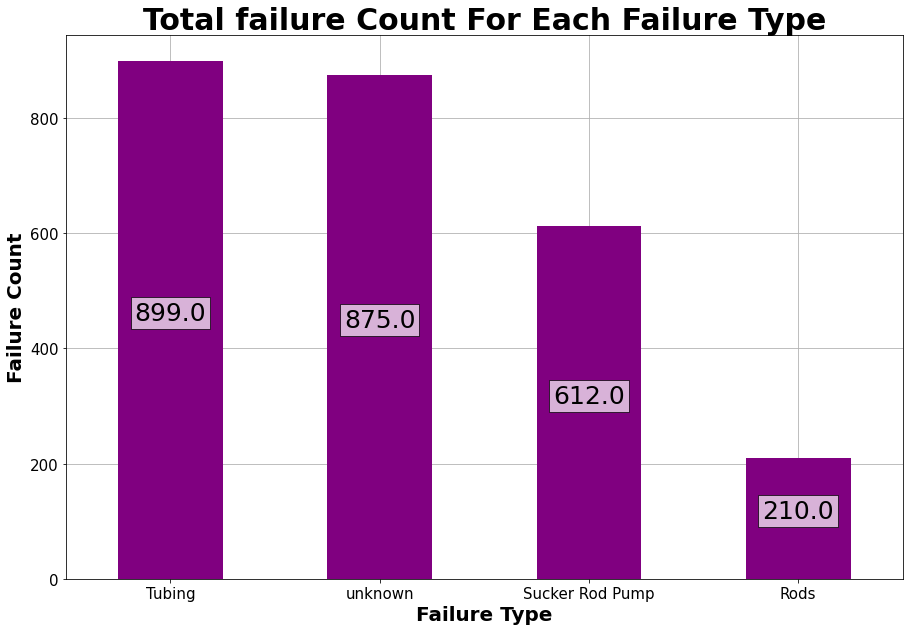

In [ ]:
plt.figure(figsize = (15,10))
fail_counts = data['FAILURETYPE'].value_counts(dropna=False)
ax = fail_counts.plot.bar(fail_counts,color = 'purple')
plt.grid()
ax.set_axisbelow(True)
plt.xticks(rotation = 0,fontsize = 15)

plt.yticks(fontsize = 15)
fail_counts
plt.title("Total failure Count For Each Failure Type",fontweight="bold",size='30')
plt.xlabel("Failure Type",fontweight="bold",size='20')
plt.ylabel("Failure Count",fontweight="bold",size='20')

for i in range(4):
  plt.text(i, fail_counts[i]//2, math.ceil(fail_counts[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7),size='25')

fail_counts

# Methods

## Our custom methods

In [ ]:
# Applies filter to data, removes any none float values, scales from -1 to 1, and removes any nans

# def clean_scale_data(data):
#   data = data.select_dtypes("float")
#   data = data[filters_avg]
#   data_scaled = preprocessing.scale(data[1:])
#   data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
#   data_scaled = data_scaled.replace(np.nan, 0)
#   return data_scaled

def clean_scale_data(data):
    data = data.select_dtypes("float")
    data = data[filters_avg]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    data_scaled = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    data_scaled = data_scaled.replace(np.nan, 0)
    return data_scaled

In [ ]:

#Finds the average given the flow data, type data, and specific line

def average_finder(data, type_, line):
  counts = 0
  sum = 0
  for i in range(len(data)):
    if type_[i] == line and not math.isnan(data[i]):
      sum += data[i]
      counts+=1
  return sum/counts



In [ ]:
# Finds the most correlated data points in our data set
# Most correlated data points have a Pearson product-moment correlation coefficient of greater then .7

def find_correlation(data):
  for col_1 in data.columns:
    for col_2 in data.columns:
      #print(unknown_scaled[col])
      if np.corrcoef(data[col_1], data[col_2])[0][1] > .7 and col_2 != col_1:
        print("Correlation Coefficient Between : ", col_1, col_2, np.corrcoef(data[col_1], data[col_2])[0][1])
        print()


# Data processing

In [ ]:
#Goes through all failure types and replaces Nan with 'not fail'
data['FAILURETYPE'] = data['FAILURETYPE'].replace(np.nan, 'unknown')

It was necessary for us to filter our data by the specific rod pump failure types listed, and as follows are those new dataframes with their own set of descriptive statistics within each failure type. Of interest, we are evaluating specifically the tubing failures, rod failures, sucker rod pump failues, and the unknown/no failure condition.

In [ ]:
tubing_data = data[data["FAILURETYPE"] == 'Tubing']
tubing_data_scaled = clean_scale_data(tubing_data)

In [ ]:
rods_data = data[data["FAILURETYPE"] == 'Rods']
rods_data_scaled = clean_scale_data(rods_data)


In [ ]:
Sucker_Rod_Pump = data[data["FAILURETYPE"] == 'Sucker Rod Pump']
Sucker_Rod_Pump_scaled = clean_scale_data(Sucker_Rod_Pump)




In [ ]:
unknown = data[data["FAILURETYPE"] == 'unknown']
unknown_scaled = clean_scale_data(unknown)

In [ ]:
data_scaled = clean_scale_data(data)
data_scaled


,AVG_OIL_VOLUME
0,-0.803542
1,-0.646669
2,-0.821052
3,-0.671345
4,-0.701082
...,...
2591,-0.645050
2592,-0.552276
2593,-0.942606
2594,-0.859879


# Data Analysis


Within this next section of code, we decided to further investigate the relationship between failure types and the average flowline pressure, average tubing pressure, and average casing pressure. We then graphed the results in bar charts to more easily evaluate the data.

## *Descriptive statistics*


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S_CONCENTRATION,2596.0,10.201565,334.210313,0.000000,0.000000,0.000000,0.000000,16500.000000
PrimarySetpoint,2596.0,74.603984,6.764605,0.000000,75.000000,75.000000,75.000000,91.000000
SecondarySetpoint,2596.0,57.261142,15.605830,0.000000,60.000000,60.000000,65.000000,100.000000
StrokeLength,2596.0,148.365133,15.358867,0.000000,144.000000,144.000000,145.500000,336.000000
GrossStrokeLength,1500.0,130.684180,32.795507,0.000000,114.721007,128.993368,146.428001,655.000000
Fillage,1984.0,81.724088,27.540903,0.000000,75.599998,87.000000,95.105627,655.299988
YesterdaysAverageSPM,1825.0,5.426529,1.099363,0.000000,5.000000,5.700000,6.000000,7.700000
chemgroup1_any,2596.0,0.470339,0.499216,0.000000,0.000000,0.000000,1.000000,1.000000
chemgroup1_all,2596.0,0.083975,0.277404,0.000000,0.000000,0.000000,0.000000,1.000000
chemgroup2_any,2596.0,0.233436,0.423099,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
tubing_data_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG_OIL_VOLUME,899.0,-0.610395,0.218954,-1.0,-0.761451,-0.645483,-0.500756,1.0


In [ ]:
rods_data_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG_OIL_VOLUME,210.0,-0.490566,0.292528,-1.0,-0.683321,-0.528646,-0.345684,1.0


In [ ]:
Sucker_Rod_Pump_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG_OIL_VOLUME,612.0,-0.648291,0.282893,-1.0,-0.841921,-0.71283,-0.535706,1.0


In [ ]:
unknown_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG_OIL_VOLUME,875.0,-0.532023,0.343834,-1.0,-0.766144,-0.610093,-0.391821,1.0


## *Averages*

After manually comparing the means of each failure type, we marked each variable we wanted to explore in more detail. We became curious if there was a difference in H2S concentration between the rod pumps who have failed and the ones who have not/no data. The results show a difference in the means of H2S concentration between the two, and could potentially be a variable for us to investigate further. The means of differential pressure is another variable of interest to us as well.

In [ ]:
#Finds the average pressure flowline, tubing, and casing when there was a "Not Fail" failure
avg_fp_nf = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'unknown')
avg_tp_nf = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'],  'unknown')
avg_cp_nf = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'unknown')

print('AVG_PRESS_FLOWLINE : ', avg_fp_nf, '\nAVG_PRESSURE_TUBING : ', avg_tp_nf, '\nAVG_PRESSURE_CASING : ',  avg_cp_nf)

AVG_PRESS_FLOWLINE :  59.60554195084271 
AVG_PRESSURE_TUBING :  91.96128098023244 
AVG_PRESSURE_CASING :  112.04864174941994


In [ ]:
#Finds the average pressure flowline, tubing, and casing when there was a "Rods" failure
avg_fp_rf = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'Rods')
avg_tp_rf = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'Rods')
avg_cp_rf = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'Rods')

print('AVG_PRESS_FLOWLINE : ', avg_fp_rf, '\nAVG_PRESSURE_TUBING : ', avg_tp_rf, '\nAVG_PRESSURE_CASING : ',  avg_cp_rf)

AVG_PRESS_FLOWLINE :  60.536550919999996 
AVG_PRESSURE_TUBING :  83.82031614077664 
AVG_PRESSURE_CASING :  107.89383969268289


In [ ]:
#Finds the average pressure flowline, tubing, and casing when there was a "Sucker Rod Pump" failure
avg_fp_srpf = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'Sucker Rod Pump')
avg_tp_srpf = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'Sucker Rod Pump')
avg_cp_srpf  = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_PRESS_FLOWLINE : ', avg_fp_srpf, '\nAVG_PRESSURE_TUBING : ', avg_tp_srpf, '\nAVG_PRESSURE_CASING : ',  avg_cp_srpf)

AVG_PRESS_FLOWLINE :  51.11591142424245 
AVG_PRESSURE_TUBING :  71.14136605442174 
AVG_PRESSURE_CASING :  97.63138493050849


In [ ]:
#Finds the average pressure flowline, tubing, and casing when there was a "Tubing" failure
avg_fp_tf = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'Tubing')
avg_tp_tf = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'Tubing')
avg_cp_tf = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'Tubing')

print('AVG_PRESS_FLOWLINE : ', avg_fp_tf, '\nAVG_PRESSURE_TUBING : ', avg_tp_tf, '\nAVG_PRESSURE_CASING : ',  avg_cp_tf)

AVG_PRESS_FLOWLINE :  58.05081408274649 
AVG_PRESSURE_TUBING :  91.22895097624432 
AVG_PRESSURE_CASING :  133.28783301352865


In [ ]:
#Finds the average tube pressure among the failure types
avg_tp_unknown = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'unknown')
avg_tp_tubing = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'],  'Tubing')
avg_tp_rods = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'Rods')
avg_tp_srp = average_finder(data['AVG_PRESSURE_TUBING'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_PRESSURE_TUBING : ', avg_tp_unknown, '\nAVG_PRESSURE_TUBING : ', avg_tp_tubing, '\nAVG_PRESSURE_TUBING : ', avg_tp_rods, '\nAVG_PRESSURE_TUBING : ', avg_tp_srp)

AVG_PRESSURE_TUBING :  91.96128098023244 
AVG_PRESSURE_TUBING :  91.22895097624432 
AVG_PRESSURE_TUBING :  83.82031614077664 
AVG_PRESSURE_TUBING :  71.14136605442174


In [ ]:
#Finds the average flowline pressure among the failure types
avg_fp_unknown = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'unknown')
avg_fp_tubing = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'],  'Tubing')
avg_fp_rods = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'Rods')
avg_fp_srp = average_finder(data['AVG_PRESS_FLOWLINE'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_PRESS_FLOWLINE : ', avg_fp_unknown, '\nAVG_PRESS_FLOWLINE : ', avg_fp_tubing, '\nAVG_PRESS_FLOWLINE : ', avg_fp_rods, '\nAVG_PRESS_FLOWLINE : ', avg_fp_srp)

AVG_PRESS_FLOWLINE :  59.60554195084271 
AVG_PRESS_FLOWLINE :  58.05081408274649 
AVG_PRESS_FLOWLINE :  60.536550919999996 
AVG_PRESS_FLOWLINE :  51.11591142424245


In [ ]:
#Finds the average casing pressure among the failure types
avg_cp_unknown = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'unknown')
avg_cp_tubing = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'],  'Tubing')
avg_cp_rods = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'Rods')
avg_cp_srp = average_finder(data['AVG_PRESSURE_CASING'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_PRESSURE_CASING : ', avg_cp_unknown, '\nAVG_PRESSURE_CASING : ', avg_cp_tubing, '\nAVG_PRESSURE_CASING : ', avg_cp_rods, '\nAVG_PRESSURE_CASING : ', avg_cp_srp)

AVG_PRESSURE_CASING :  112.04864174941994 
AVG_PRESSURE_CASING :  133.28783301352865 
AVG_PRESSURE_CASING :  107.89383969268289 
AVG_PRESSURE_CASING :  97.63138493050849


In [ ]:
#Finds the average H2S_CONCENTRATION among the failure types
avg_H2S_concentration_unknown = average_finder(data['H2S_CONCENTRATION'],  data['FAILURETYPE'], 'unknown')
avg_H2S_concentration_tubing = average_finder(data['H2S_CONCENTRATION'],  data['FAILURETYPE'],  'Tubing')
avg_H2S_concentration_rods = average_finder(data['H2S_CONCENTRATION'],  data['FAILURETYPE'], 'Rods')
avg_H2S_concentration_srp = average_finder(data['H2S_CONCENTRATION'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('H2S_CONCENTRATION : ', avg_H2S_concentration_unknown, '\nH2S_CONCENTRATION : ', avg_H2S_concentration_tubing, '\nH2S_CONCENTRATION : ', avg_H2S_concentration_rods, '\nH2S_CONCENTRATION : ', avg_H2S_concentration_srp)

H2S_CONCENTRATION :  25.078857142857142 
H2S_CONCENTRATION :  3.602071190211346 
H2S_CONCENTRATION :  0.4095238095238095 
H2S_CONCENTRATION :  1.9852941176470589


In [ ]:
#Finds the average differential pressure among the failure types
avg_dp_unknown = average_finder(data['AVG_DIFFERENTIAL_PRESSURE'],  data['FAILURETYPE'], 'unknown')
avg_dp_tubing = average_finder(data['AVG_DIFFERENTIAL_PRESSURE'],  data['FAILURETYPE'],  'Tubing')
avg_dp_rods = average_finder(data['AVG_DIFFERENTIAL_PRESSURE'],  data['FAILURETYPE'], 'Rods')
avg_dp_srp = average_finder(data['AVG_DIFFERENTIAL_PRESSURE'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_DIFFERENTIAL_PRESSURE : ', avg_dp_unknown, '\nAVG_DIFFERENTIAL_PRESSURE : ', avg_dp_tubing, '\nAVG_DIFFERENTIAL_PRESSURE : ', avg_dp_rods, '\nAVG_DIFFERENTIAL_PRESSURE : ', avg_dp_srp)

AVG_DIFFERENTIAL_PRESSURE :  20.832170362369347 
AVG_DIFFERENTIAL_PRESSURE :  43.53608883652758 
AVG_DIFFERENTIAL_PRESSURE :  14.25435674757282 
AVG_DIFFERENTIAL_PRESSURE :  29.917136209183692


In [ ]:
#Finds the average water volume among the failure types
avg_wv_unknown = average_finder(data['AVG_WATER_VOLUME'],  data['FAILURETYPE'], 'unknown')
avg_wv_tubing = average_finder(data['AVG_WATER_VOLUME'],  data['FAILURETYPE'],  'Tubing')
avg_wv_rods = average_finder(data['AVG_WATER_VOLUME'],  data['FAILURETYPE'], 'Rods')
avg_wv_srp = average_finder(data['AVG_WATER_VOLUME'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_WATER_VOLUME : ', avg_wv_unknown, '\nAVG_WATER_VOLUME : ', avg_wv_tubing, '\nAVG_WATER_VOLUME : ', avg_wv_rods, '\nAVG_WATER_VOLUME : ', avg_wv_srp)

AVG_WATER_VOLUME :  40.73589698281788 
AVG_WATER_VOLUME :  53.81594010789762 
AVG_WATER_VOLUME :  40.510446312499965 
AVG_WATER_VOLUME :  25.489882897993308


In [ ]:
#Finds the average liquid volume among the failure types
avg_lv_unknown = average_finder(data['AVG_LIQUID_VOLUME'],  data['FAILURETYPE'], 'unknown')
avg_lv_tubing = average_finder(data['AVG_LIQUID_VOLUME'],  data['FAILURETYPE'],  'Tubing')
avg_lv_rods = average_finder(data['AVG_LIQUID_VOLUME'],  data['FAILURETYPE'], 'Rods')
avg_lv_srp = average_finder(data['AVG_LIQUID_VOLUME'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_LIQUID_VOLUME : ', avg_lv_unknown, '\nAVG_LIQUID_VOLUMEE : ', avg_lv_tubing, '\nAVG_LIQUID_VOLUME : ', avg_lv_rods, '\nAVG_LIQUID_VOLUME : ', avg_lv_srp)

AVG_LIQUID_VOLUME :  116.67828887056115 
AVG_LIQUID_VOLUMEE :  154.38460003003337 
AVG_LIQUID_VOLUME :  114.6052473317308 
AVG_LIQUID_VOLUME :  94.17243959698988


In [ ]:
#Finds the overall max sideload among the failure types
avg_oms_unknown = average_finder(data['overall_max_sideload'],  data['FAILURETYPE'], 'unknown')
avg_oms_tubing = average_finder(data['overall_max_sideload'],  data['FAILURETYPE'],  'Tubing')
avg_oms_rods = average_finder(data['overall_max_sideload'],  data['FAILURETYPE'], 'Rods')
avg_oms_srp = average_finder(data['overall_max_sideload'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('overall_max_sideload : ', avg_oms_unknown, '\noverall_max_sideload : ', avg_oms_tubing, '\noverall_max_sideload : ', avg_oms_rods, '\noverall_max_sideload : ', avg_oms_srp)

overall_max_sideload :  190.90440677966114 
overall_max_sideload :  210.94340523882903 
overall_max_sideload :  228.06490322580652 
overall_max_sideload :  158.99365535248035


In [ ]:
#Finds the average liquid volume among the failure types
avg_mus_unknown = average_finder(data['max_unguided_sideload'],  data['FAILURETYPE'], 'unknown')
avg_mus_tubing = average_finder(data['max_unguided_sideload'],  data['FAILURETYPE'],  'Tubing')
avg_mus_rods = average_finder(data['max_unguided_sideload'],  data['FAILURETYPE'], 'Rods')
avg_mus_srp = average_finder(data['max_unguided_sideload'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('max_unguided_sideload : ', avg_mus_unknown, '\nmax_unguided_sideload : ', avg_mus_tubing, '\nmax_unguided_sideload : ', avg_mus_rods, '\nmax_unguided_sideload : ', avg_mus_srp)

max_unguided_sideload :  157.44903773584906 
max_unguided_sideload :  182.15044684129447 
max_unguided_sideload :  193.94225806451618 
max_unguided_sideload :  140.2439686684073


In [ ]:
#Finds the average oil volume among the failure types
avg_ov_unknown = average_finder(data['AVG_OIL_VOLUME'],  data['FAILURETYPE'], 'unknown')
avg_ov_tubing = average_finder(data['AVG_OIL_VOLUME'],  data['FAILURETYPE'],  'Tubing')
avg_ov_rods = average_finder(data['AVG_OIL_VOLUME'],  data['FAILURETYPE'], 'Rods')
avg_ov_srp = average_finder(data['AVG_OIL_VOLUME'],  data['FAILURETYPE'], 'Sucker Rod Pump')

print('AVG_OIL_VOLUME : ', avg_ov_unknown, '\nAVG_OIL_VOLUME : ', avg_ov_tubing, '\nAVG_OIL_VOLUME : ', avg_ov_rods, '\nAVG_OIL_VOLUME : ', avg_ov_srp)

AVG_OIL_VOLUME :  75.1315285532646 
AVG_OIL_VOLUME :  100.56085354727469 
AVG_OIL_VOLUME :  74.09555214423077 
AVG_OIL_VOLUME :  68.67776000167228


Here we graphed out all of the averages among the variables in our dataset across the failure types. We then combined all the graphs at the end of

## *Charts of Averages*

Text(0, 0.5, 'Average Pressure')

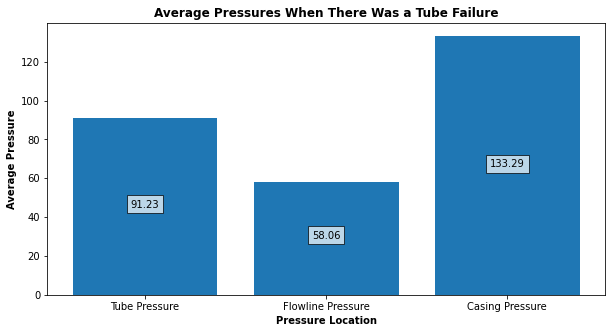

In [ ]:
tube_failure_pressures = [avg_tp_tf,avg_fp_tf,avg_cp_tf]
x = ["Tube Pressure","Flowline Pressure","Casing Pressure"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, tube_failure_pressures[i]//2, math.ceil(tube_failure_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,tube_failure_pressures)
plt.title("Average Pressures When There Was a Tube Failure",fontweight="bold")
plt.xlabel("Pressure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")


Text(0, 0.5, 'Average Pressure')

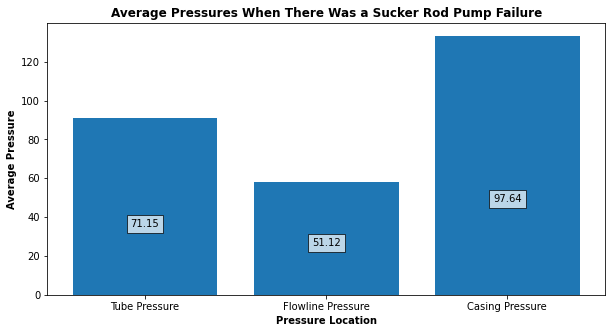

In [ ]:
SRP_failure_pressures = [avg_tp_srpf,avg_fp_srpf,avg_cp_srpf]
x = ["Tube Pressure","Flowline Pressure","Casing Pressure"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, SRP_failure_pressures[i]//2, math.ceil(SRP_failure_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,tube_failure_pressures)
plt.title("Average Pressures When There Was a Sucker Rod Pump Failure",fontweight="bold")
plt.xlabel("Pressure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")


Text(0, 0.5, 'Average Pressure')

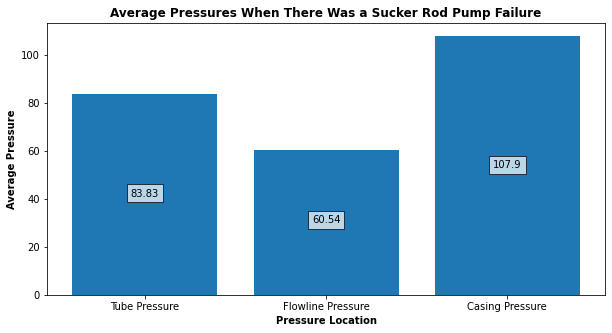

In [ ]:
rod_failure_pressures = [avg_tp_rf,avg_fp_rf,avg_cp_rf]
x = ["Tube Pressure","Flowline Pressure","Casing Pressure"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, rod_failure_pressures[i]//2, math.ceil(rod_failure_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,rod_failure_pressures)
plt.title("Average Pressures When There Was a Sucker Rod Pump Failure",fontweight="bold")
plt.xlabel("Pressure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

Text(0, 0.5, 'Average Pressure')

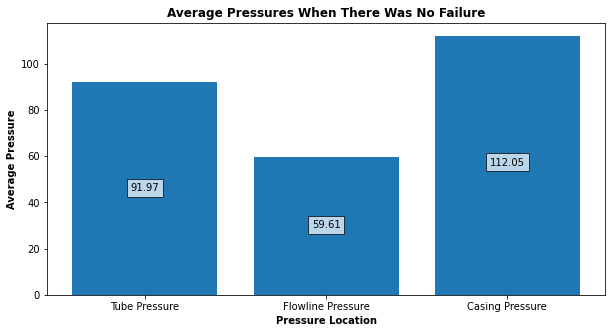

In [ ]:
no_failure_pressures = [avg_tp_nf,avg_fp_nf,avg_cp_nf]
x = ["Tube Pressure","Flowline Pressure","Casing Pressure"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, no_failure_pressures[i]//2, math.ceil(no_failure_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,no_failure_pressures)
plt.title("Average Pressures When There Was No Failure",fontweight="bold")
plt.xlabel("Pressure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

Text(0, 0.5, 'Average Pressure')

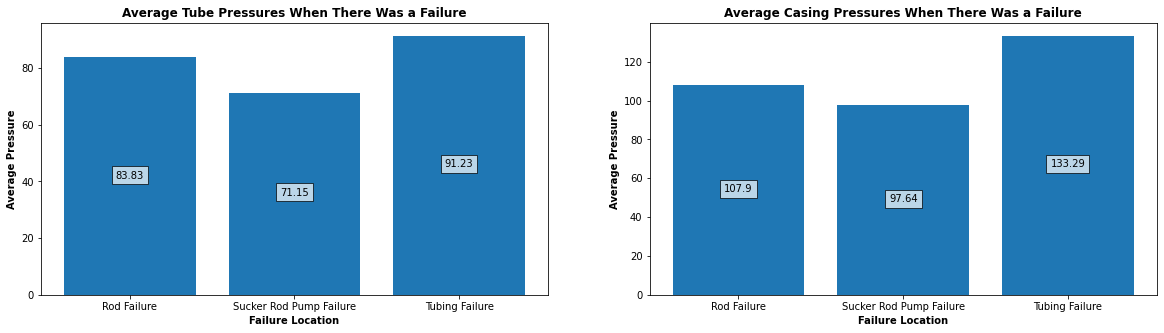

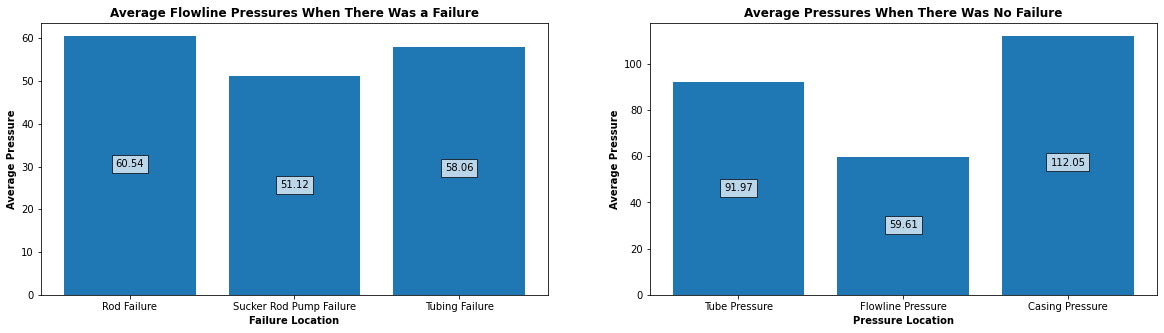

In [ ]:
all_tube_pressures = [avg_tp_rf,avg_tp_srpf,avg_tp_tf]
x = ["Rod Failure","Sucker Rod Pump Failure","Tubing Failure"]
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
for i in range(len(x)):
  plt.text(i, all_tube_pressures[i]//2, math.ceil(all_tube_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,all_tube_pressures)
plt.title("Average Tube Pressures When There Was a Failure",fontweight="bold")
plt.xlabel("Failure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

all_casing_pressures = [avg_cp_rf,avg_cp_srpf,avg_cp_tf]
plt.subplot(1, 2, 2)
for i in range(len(x)):
  plt.text(i, all_casing_pressures[i]//2, math.ceil(all_casing_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))
plt.bar(x,all_casing_pressures)
plt.title("Average Casing Pressures When There Was a Failure",fontweight="bold")
plt.xlabel("Failure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

all_line_pressures = [avg_fp_rf,avg_fp_srpf,avg_fp_tf]
plt.figure(figsize = (20,5))
plt.subplot(1, 2, 1)
for i in range(len(x)):
  plt.text(i, all_line_pressures[i]//2, math.ceil(all_line_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,all_line_pressures)
plt.title("Average Flowline Pressures When There Was a Failure",fontweight="bold")
plt.xlabel("Failure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

no_failure_pressures = [avg_tp_nf,avg_fp_nf,avg_cp_nf]
x = ["Tube Pressure","Flowline Pressure","Casing Pressure"]
plt.subplot(1, 2, 2)

for i in range(len(x)):
  plt.text(i, no_failure_pressures[i]//2, math.ceil(no_failure_pressures[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,no_failure_pressures)
plt.title("Average Pressures When There Was No Failure",fontweight="bold")
plt.xlabel("Pressure Location",fontweight="bold")
plt.ylabel("Average Pressure",fontweight="bold")

Text(0, 0.5, 'Average Tubing Pressure')

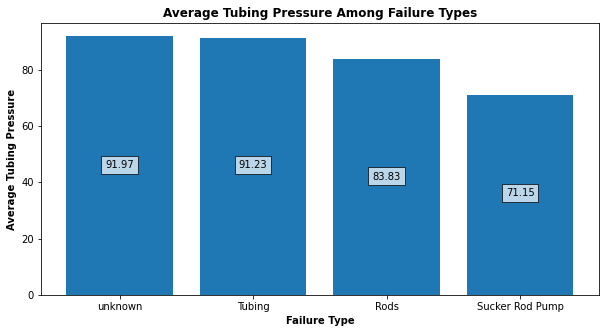

In [ ]:
avg_tp = [avg_tp_unknown,avg_tp_tubing,avg_tp_rods,avg_tp_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_tp[i]//2, math.ceil(avg_tp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_tp)
plt.title("Average Tubing Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Tubing Pressure",fontweight="bold")

Text(0, 0.5, 'Average Flowline Pressure')

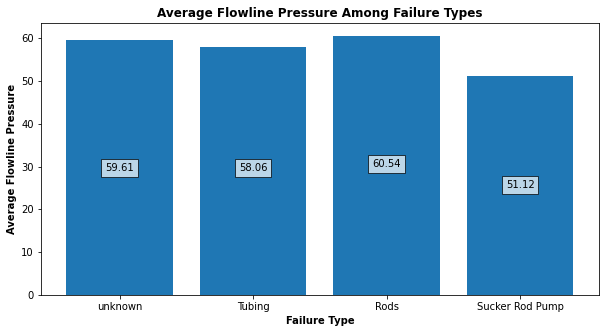

In [ ]:
avg_fp = [avg_fp_unknown,avg_fp_tubing,avg_fp_rods,avg_fp_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_fp[i]//2, math.ceil(avg_fp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_fp)
plt.title("Average Flowline Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Flowline Pressure",fontweight="bold")

Text(0, 0.5, 'Average Casing Pressure')

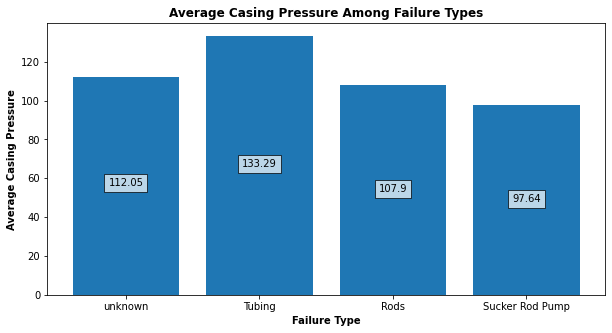

In [ ]:
avg_cp = [avg_cp_unknown,avg_cp_tubing,avg_cp_rods,avg_cp_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_cp[i]//2, math.ceil(avg_cp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_cp)
plt.title("Average Casing Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Casing Pressure",fontweight="bold")

Text(0, 0.5, 'Average H2S Concentration')

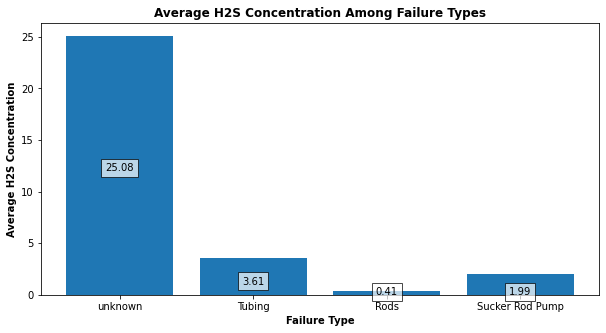

In [ ]:
avg_H2S_concentration = [avg_H2S_concentration_unknown,avg_H2S_concentration_tubing,avg_H2S_concentration_rods,avg_H2S_concentration_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_H2S_concentration[i]//2, math.ceil(avg_H2S_concentration[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_H2S_concentration)
plt.title("Average H2S Concentration Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average H2S Concentration",fontweight="bold")

Text(0, 0.5, 'Average Differential Pressure')

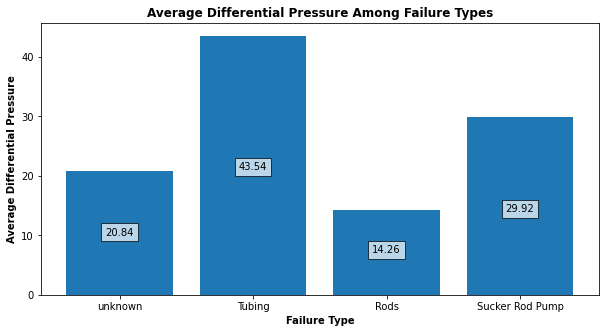

In [ ]:
avg_dp = [avg_dp_unknown,avg_dp_tubing,avg_dp_rods,avg_dp_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_dp[i]//2, math.ceil(avg_dp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_dp)
plt.title("Average Differential Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Differential Pressure",fontweight="bold")

Text(0, 0.5, 'Average Water Volume')

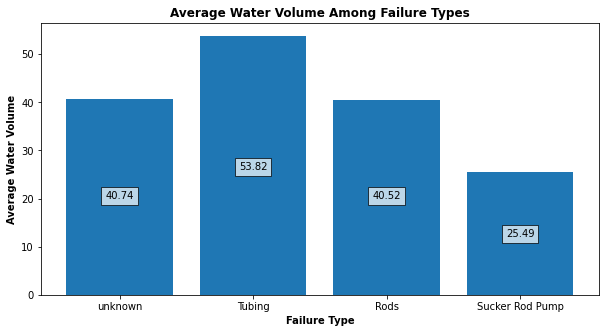

In [ ]:
avg_wv = [avg_wv_unknown,avg_wv_tubing,avg_wv_rods,avg_wv_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_wv[i]//2, math.ceil(avg_wv[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_wv)
plt.title("Average Water Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Water Volume",fontweight="bold")

Text(0, 0.5, 'Average Liquid Volume')

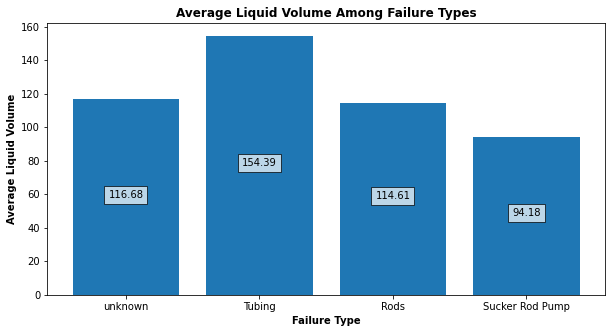

In [ ]:
avg_lv = [avg_lv_unknown,avg_lv_tubing,avg_lv_rods,avg_lv_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_lv[i]//2, math.ceil(avg_lv[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_lv)
plt.title("Average Liquid Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Liquid Volume",fontweight="bold")

Text(0, 0.5, 'Average Overall Max Sideload')

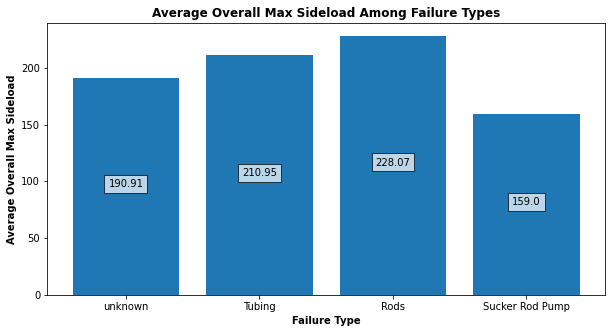

In [ ]:
avg_oms = [avg_oms_unknown,avg_oms_tubing,avg_oms_rods,avg_oms_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_oms[i]//2, math.ceil(avg_oms[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_oms)
plt.title("Average Overall Max Sideload Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Overall Max Sideload",fontweight="bold")

Text(0, 0.5, 'Average Max Unguided Sideload')

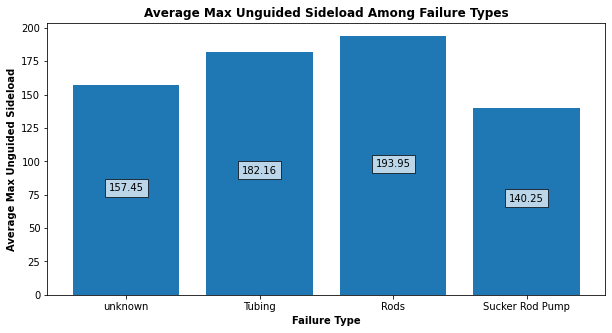

In [ ]:
avg_mus = [avg_mus_unknown,avg_mus_tubing,avg_mus_rods,avg_mus_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (10,5))

for i in range(len(x)):
  plt.text(i, avg_mus[i]//2, math.ceil(avg_mus[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_mus)
plt.title("Average Max Unguided Sideload Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Max Unguided Sideload",fontweight="bold")

Text(0, 0.5, 'Average Oil Volume')

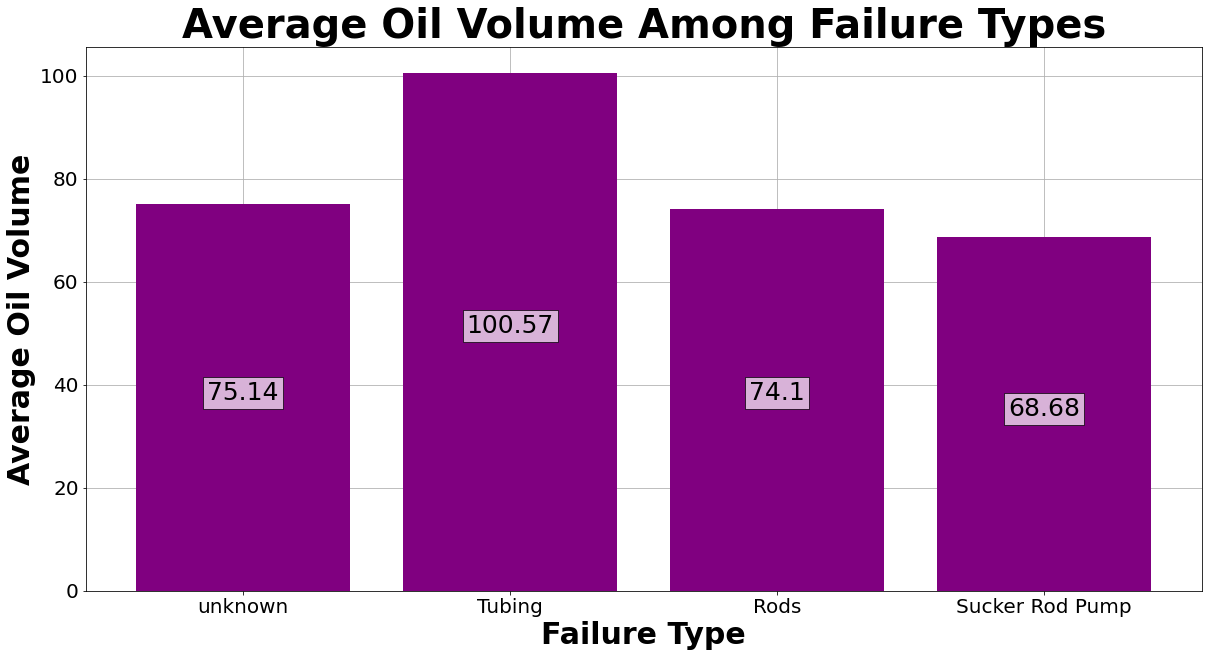

In [ ]:
avg_ov = [avg_ov_unknown,avg_ov_tubing,avg_ov_rods,avg_ov_srp]
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
plt.figure(figsize = (20,10))

for i in range(len(x)):
  plt.text(i, avg_ov[i]//2, math.ceil(avg_ov[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7),size = '25')

plt.grid()
ax = plt.bar(x,avg_ov,color = 'purple',zorder=2)



plt.title("Average Oil Volume Among Failure Types",size = 40,fontweight="bold")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Failure Type",size = 30,fontweight="bold")
plt.ylabel("Average Oil Volume",size = 30,fontweight="bold")

Text(0, 0.5, 'Average Oil Volume Sideload')

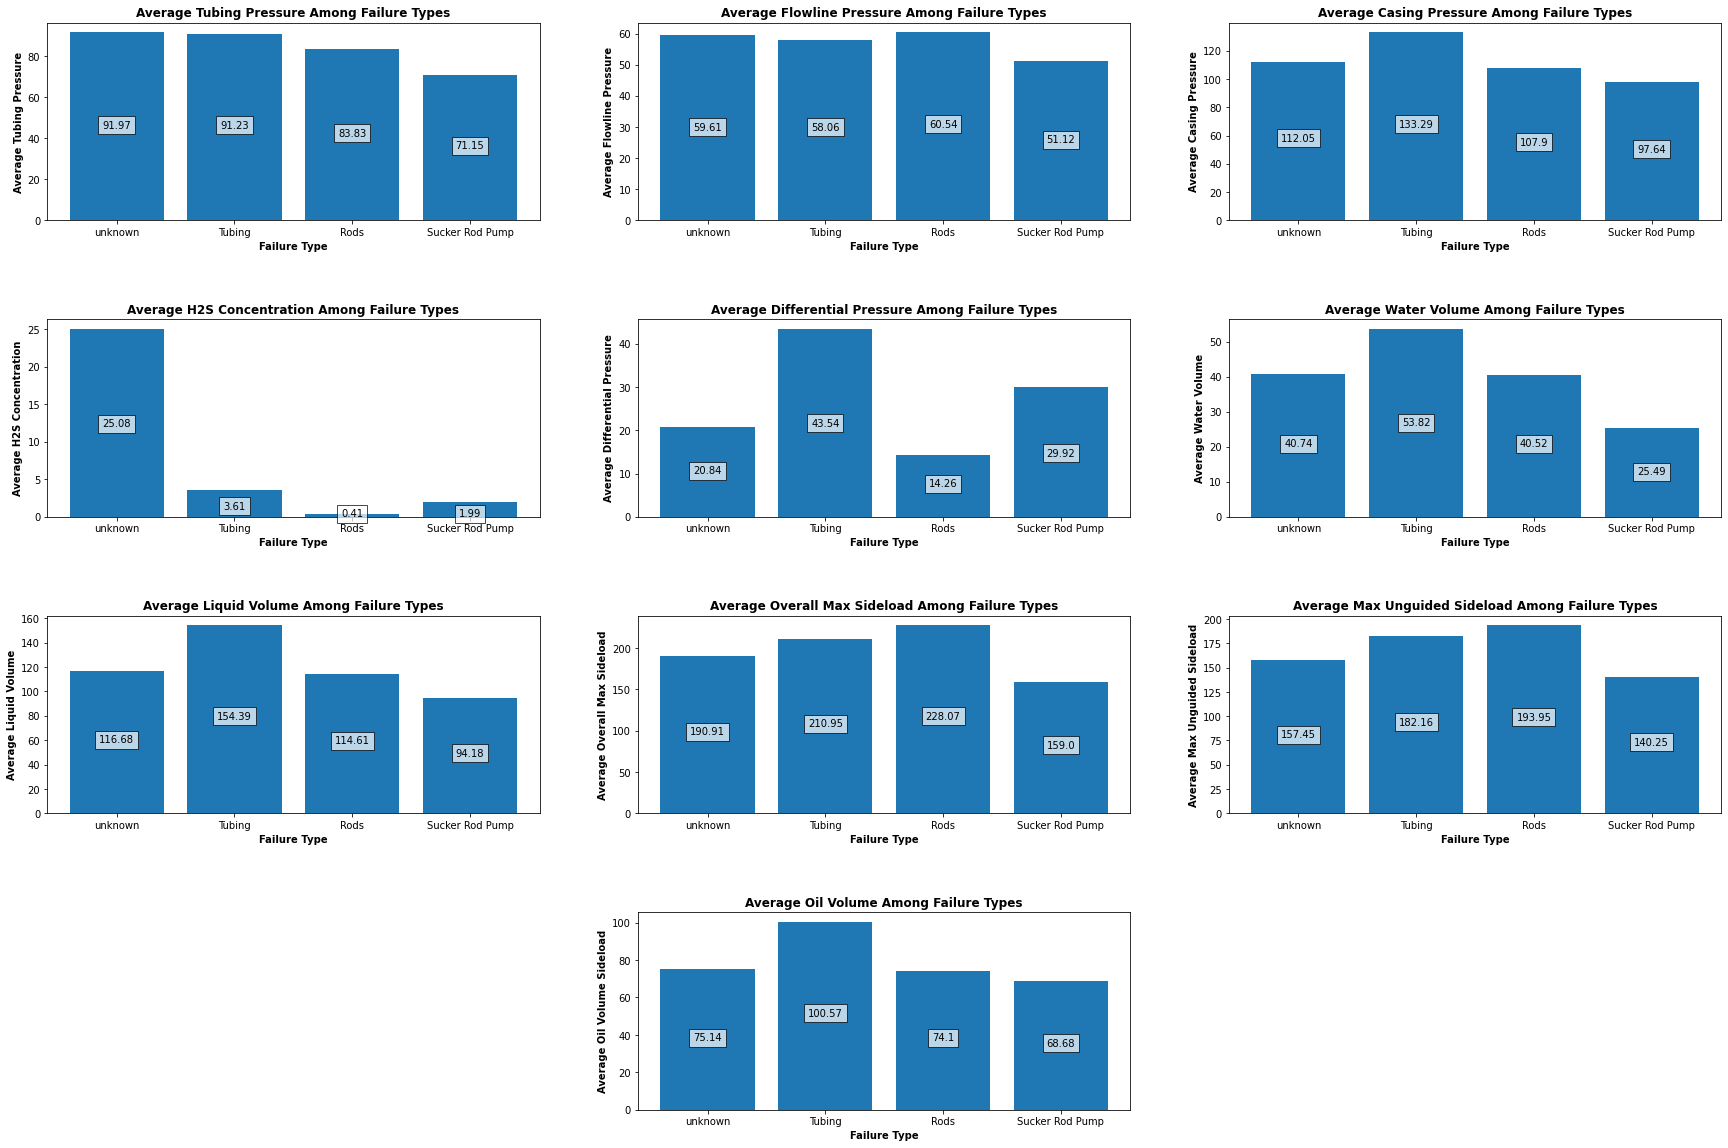

In [ ]:
x = ["unknown","Tubing","Rods", "Sucker Rod Pump"]
fig = plt.figure(figsize = (30,20))
fig.subplots_adjust(hspace=.5)
plt.subplot(4, 3, 1)

for i in range(len(x)):
  plt.text(i, avg_tp[i]//2, math.ceil(avg_tp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_tp)
plt.title("Average Tubing Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Tubing Pressure",fontweight="bold")

plt.subplot(4, 3, 2)

for i in range(len(x)):
  plt.text(i, avg_fp[i]//2, math.ceil(avg_fp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_fp)
plt.title("Average Flowline Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Flowline Pressure",fontweight="bold")

plt.subplot(4, 3, 3)

for i in range(len(x)):
  plt.text(i, avg_cp[i]//2, math.ceil(avg_cp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_cp)
plt.title("Average Casing Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Casing Pressure",fontweight="bold")

plt.subplot(4, 3, 4)

for i in range(len(x)):
  plt.text(i, avg_H2S_concentration[i]//2, math.ceil(avg_H2S_concentration[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_H2S_concentration)
plt.title("Average H2S Concentration Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average H2S Concentration",fontweight="bold")

plt.subplot(4, 3, 5)

for i in range(len(x)):
  plt.text(i, avg_dp[i]//2, math.ceil(avg_dp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_dp)
plt.title("Average Differential Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Differential Pressure",fontweight="bold")

plt.subplot(4, 3, 6)

for i in range(len(x)):
  plt.text(i, avg_wv[i]//2, math.ceil(avg_wv[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_wv)
plt.title("Average Water Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Water Volume",fontweight="bold")

plt.subplot(4, 3, 7)

for i in range(len(x)):
  plt.text(i, avg_lv[i]//2, math.ceil(avg_lv[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_lv)
plt.title("Average Liquid Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Liquid Volume",fontweight="bold")

plt.subplot(4, 3, 8)

for i in range(len(x)):
  plt.text(i, avg_oms[i]//2, math.ceil(avg_oms[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_oms)
plt.title("Average Overall Max Sideload Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Overall Max Sideload",fontweight="bold")

plt.subplot(4, 3, 9)

for i in range(len(x)):
  plt.text(i, avg_mus[i]//2, math.ceil(avg_mus[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_mus)
plt.title("Average Max Unguided Sideload Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Max Unguided Sideload",fontweight="bold")

plt.subplot(4, 3, 11)

for i in range(len(x)):
  plt.text(i, avg_ov[i]//2, math.ceil(avg_ov[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_ov)
plt.title("Average Oil Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Oil Volume Sideload",fontweight="bold")

Text(0, 0.5, 'Average Oil Volume Sideload')

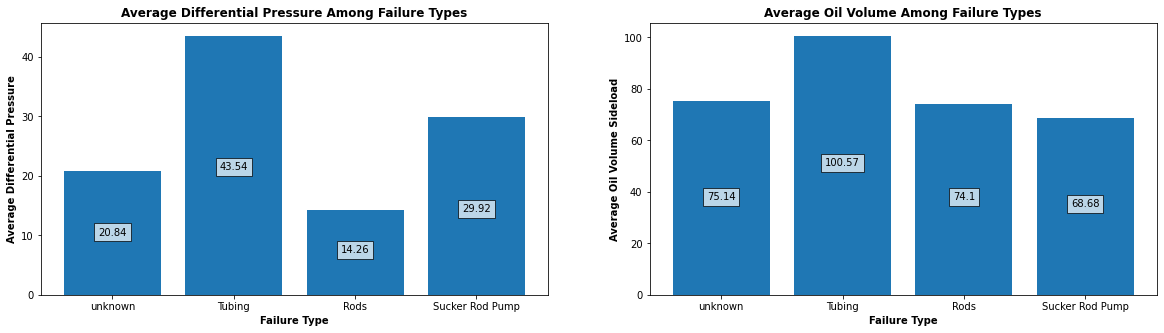

In [ ]:
fig = plt.figure(figsize = (20,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(1, 2, 1)

for i in range(len(x)):
  plt.text(i, avg_dp[i]//2, math.ceil(avg_dp[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_dp)
plt.title("Average Differential Pressure Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Differential Pressure",fontweight="bold")

plt.subplot(1, 2, 2)

for i in range(len(x)):
  plt.text(i, avg_ov[i]//2, math.ceil(avg_ov[i]*100)/100, ha = 'center', bbox = dict(facecolor = 'white', alpha = .7))

plt.bar(x,avg_ov)
plt.title("Average Oil Volume Among Failure Types",fontweight="bold")
plt.xlabel("Failure Type",fontweight="bold")
plt.ylabel("Average Oil Volume Sideload",fontweight="bold")

## Correlation Coefficient

We found the correlation coefficient between each failure type with different average means to see whether we can find any relationship between them. Here are the statistic of the most correlated data for each failure type which are greater than 0.7.

In [ ]:
# Most correlated data for unknown failure type

find_correlation(unknown_scaled)

In [ ]:
# Most correlated data for Sucker Rod Pump failure type

find_correlation(Sucker_Rod_Pump_scaled)

In [ ]:
# Most correlated data for Rod failure type

find_correlation(rods_data_scaled)

In [ ]:
# Most correlated data for Tubing failure type

find_correlation(tubing_data_scaled)

In [ ]:
#This cuts out our major outliers to make the boxplots more readable. each cuts only around 5 datapoints

data_no_outliers = data

#for i in range(len(data_no_outliers)):
#  if data_no_outliers['AVG_DIFFERENTIAL_PRESSURE'][i] < -500:
#    print(data_no_outliers['AVG_DIFFERENTIAL_PRESSURE'][i], i)


data_no_outliers = data_no_outliers[data_no_outliers.AVG_PRESS_FLOWLINE <200]
data_no_outliers = data_no_outliers[data_no_outliers.AVG_DIFFERENTIAL_PRESSURE <500]
data_no_outliers = data_no_outliers[data_no_outliers.AVG_DIFFERENTIAL_PRESSURE >-500]


## *Boxplot*

We created the boxplots between average differential pressure, average press flowline, H2S concentration and different failure types to see the data points and whether there is any potential outliers we need to notice.



<AxesSubplot:title={'center':'AVG_DIFFERENTIAL_PRESSURE'}, xlabel='FAILURETYPE'>

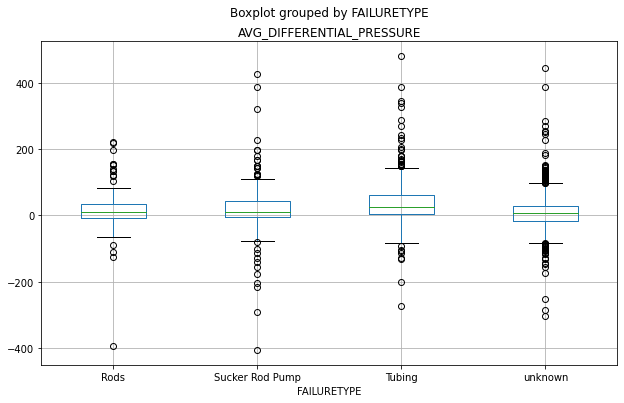

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

data_no_outliers.boxplot('AVG_DIFFERENTIAL_PRESSURE', by='FAILURETYPE', ax=ax)


<AxesSubplot:title={'center':'AVG_PRESS_FLOWLINE'}, xlabel='FAILURETYPE'>

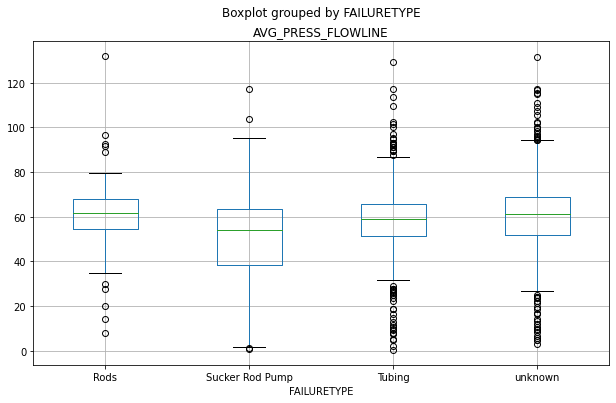

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

data_no_outliers.boxplot('AVG_PRESS_FLOWLINE', by='FAILURETYPE', ax=ax)

<AxesSubplot:title={'center':'H2S_CONCENTRATION'}, xlabel='FAILURETYPE'>

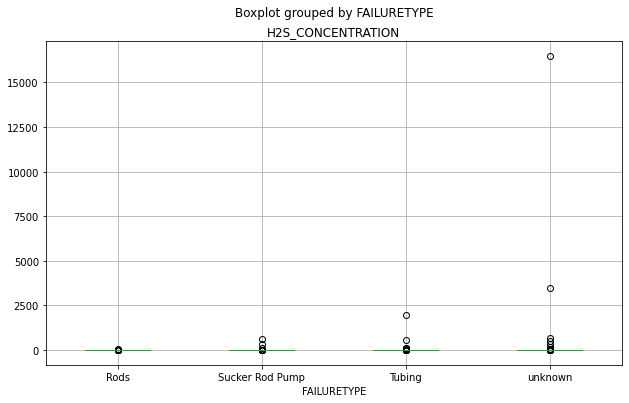

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

data_no_outliers.boxplot('H2S_CONCENTRATION', by='FAILURETYPE', ax=ax)

<AxesSubplot:title={'center':'AVG_OIL_VOLUME'}, xlabel='FAILURETYPE'>

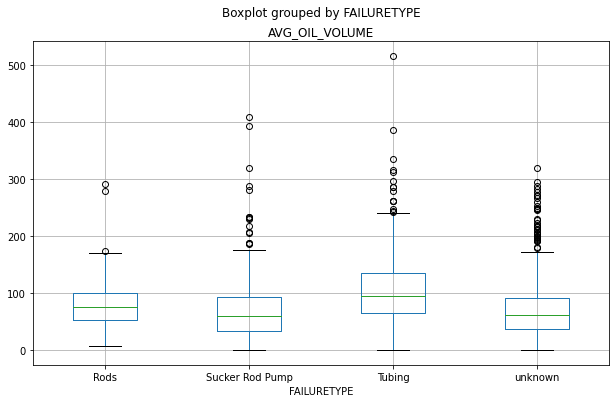

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

data_no_outliers.boxplot('AVG_OIL_VOLUME', by='FAILURETYPE', ax=ax)

Text(0, 0.5, 'Normalized Value')

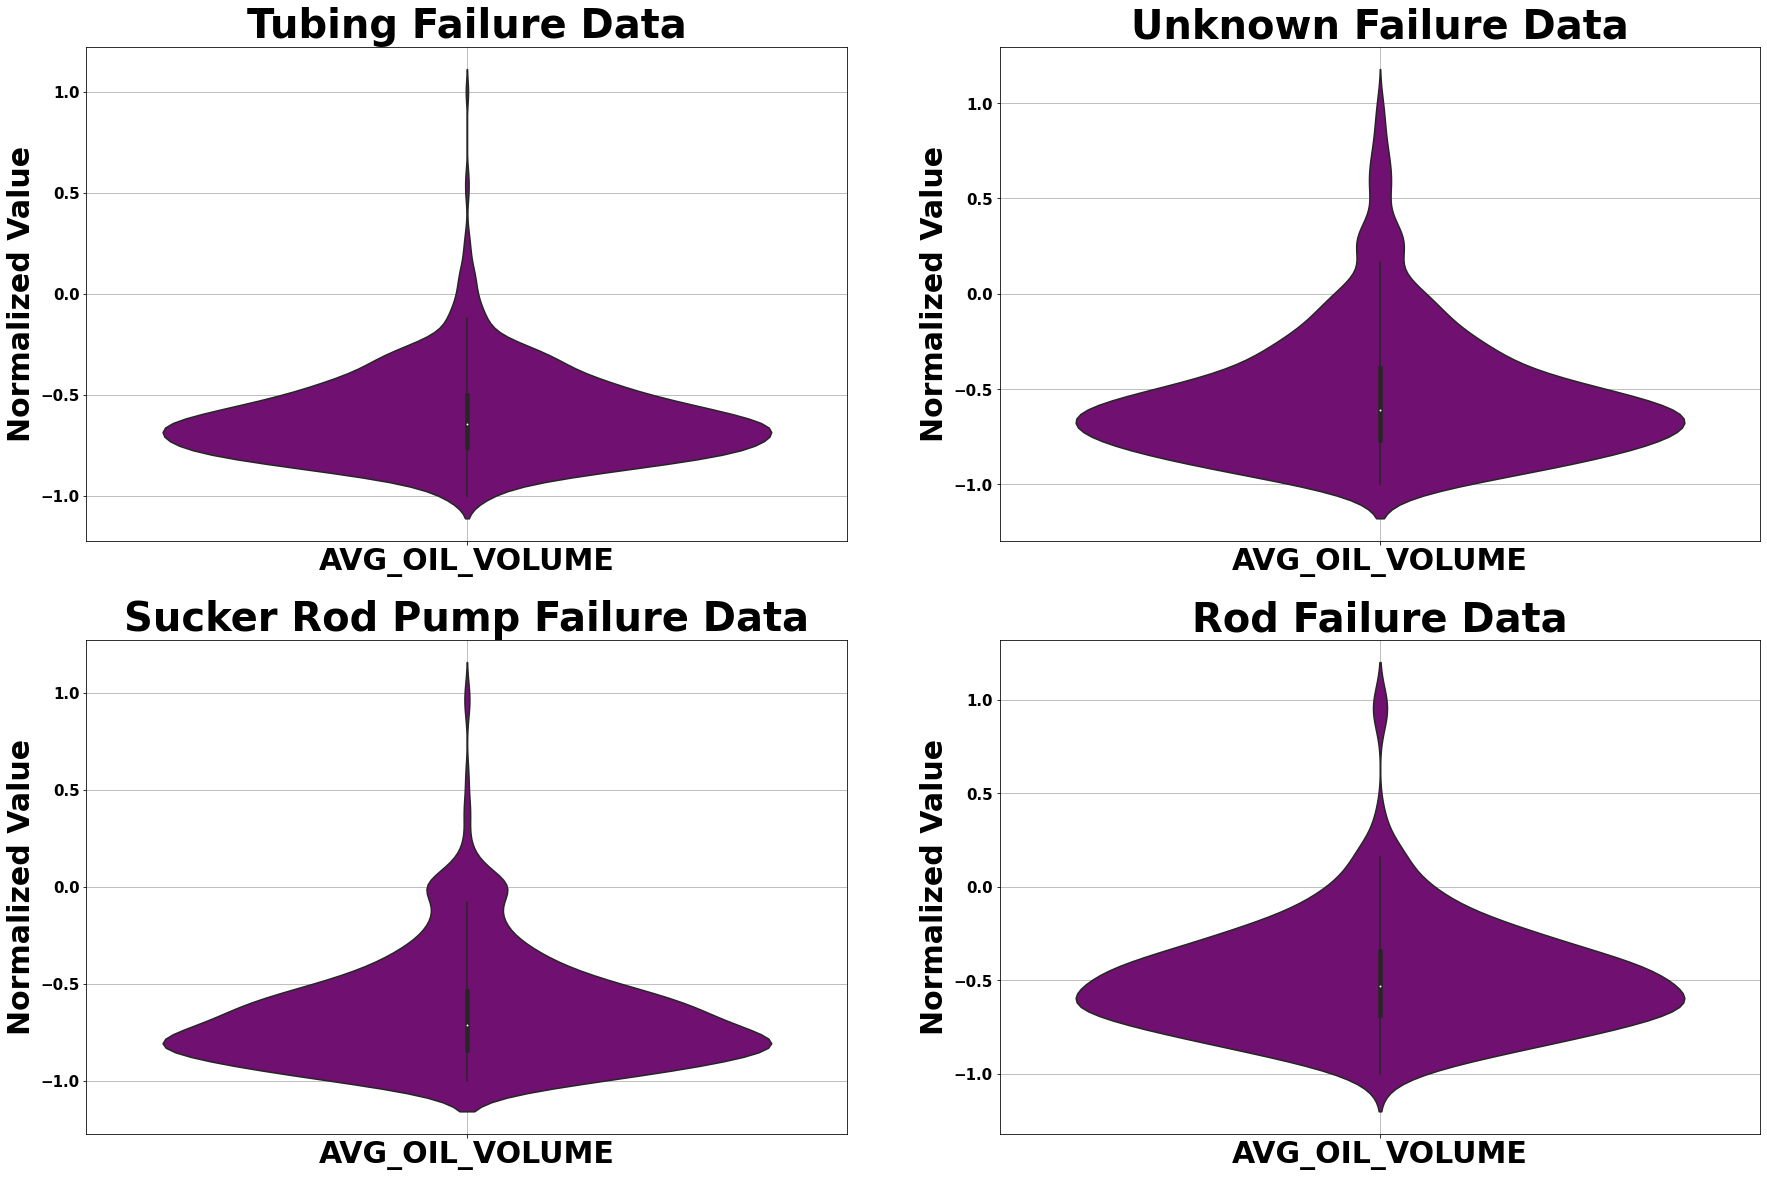

In [ ]:
# both = [tubing_data_scaled,unknown_scaled]
# result = pd.concat(both)
plt.figure(figsize=(30, 20))

fig.subplots_adjust(hspace=.8)
plt.subplot(2,2,1)
ax = sns.violinplot(data=tubing_data_scaled, width  = 0.8, color = 'purple')
plt.grid()
ax.set_axisbelow(True)

plt.title('Tubing Failure Data',size = 40, fontweight = 'bold')

plt.xticks(size = 30, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')

plt.subplot(2,2,2)
ax = sns.violinplot(data=unknown_scaled, width  = 0.8, color = 'purple')
plt.grid()
ax.set_axisbelow(True)
plt.title('Unknown Failure Data',size = 40, fontweight = 'bold')

plt.xticks(size = 30, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')


plt.subplot(2,2,3)
ax = sns.violinplot(data=Sucker_Rod_Pump_scaled, width  = 0.8, color = 'purple')
plt.grid()
ax.set_axisbelow(True)
plt.title('Sucker Rod Pump Failure Data',size = 40, fontweight = 'bold')
plt.xticks( size = 30, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')

plt.subplot(2,2,4)
ax = sns.violinplot(data=rods_data_scaled, width  = 0.8, color = 'purple')
plt.grid()
ax.set_axisbelow(True)
plt.title('Rod Failure Data',size = 40, fontweight = 'bold')
plt.xticks(size = 30, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')



Text(0, 0.5, 'Normalized Value')

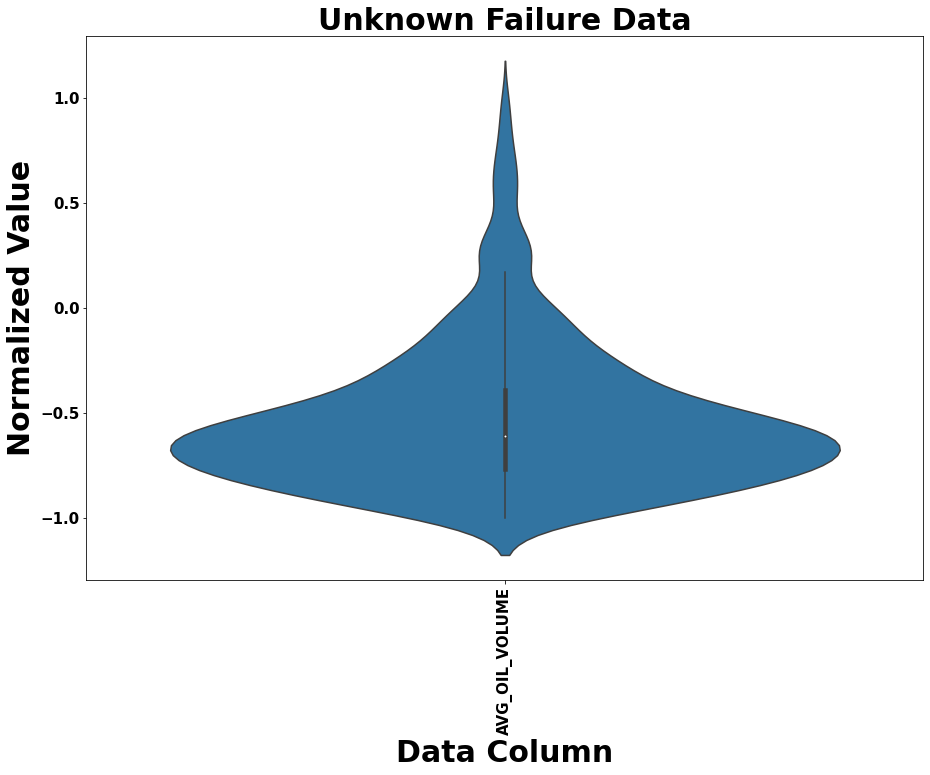

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=unknown_scaled, width  = 0.8)

plt.title('Unknown Failure Data',size = 30, fontweight = 'bold')

plt.xticks(rotation = 90, size = 15, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.xlabel('Data Column', size = 30, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')

Text(0, 0.5, 'Normalized Value')

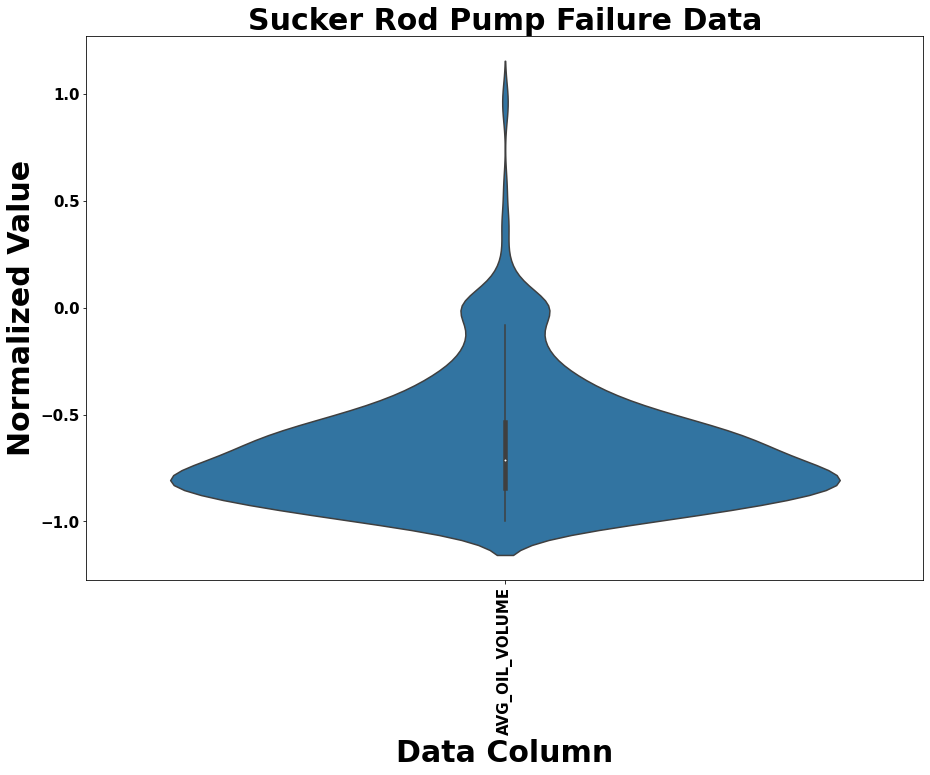

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=Sucker_Rod_Pump_scaled, width  = 0.8)

plt.title('Sucker Rod Pump Failure Data',size = 30, fontweight = 'bold')
plt.xticks(rotation = 90, size = 15, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.xlabel('Data Column', size = 30, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')

Text(0, 0.5, 'Normalized Value')

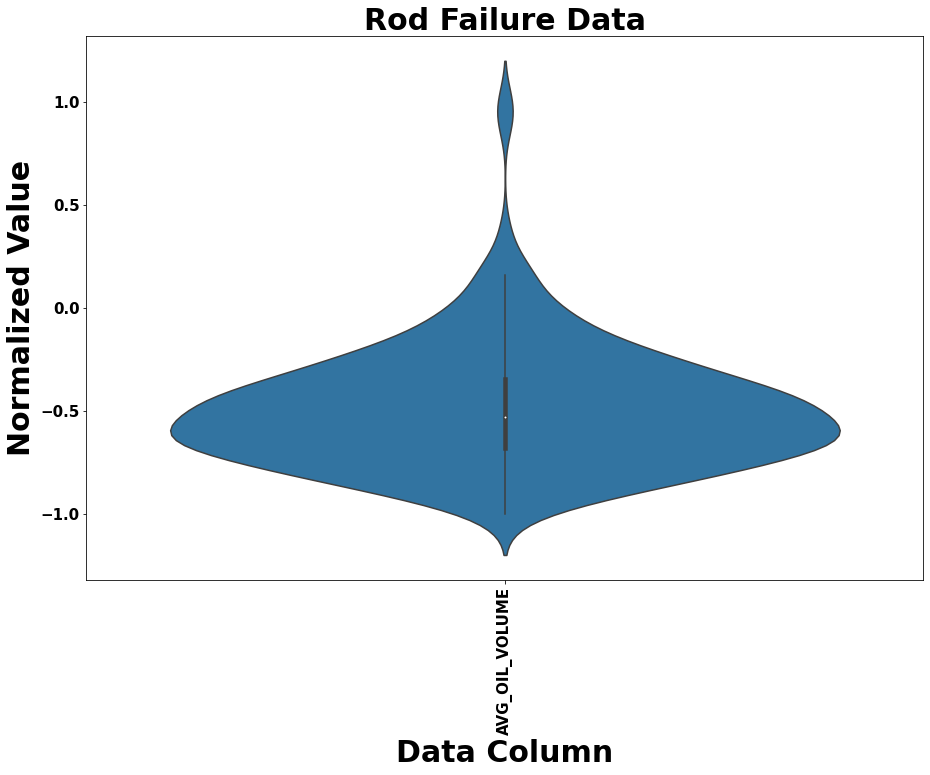

In [ ]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=rods_data_scaled, width  = 0.8)

plt.title('Rod Failure Data',size = 30, fontweight = 'bold')
plt.xticks(rotation = 90, size = 15, fontweight = 'bold')
plt.yticks(size = 15, fontweight = 'bold')
plt.xlabel('Data Column', size = 30, fontweight = 'bold')
plt.ylabel('Normalized Value', size = 30, fontweight = 'bold')

### *ANOVA Test*

Anova is a technique to examine whether two variables' means are significantly different or not. By looking at these statistic, specifically F, we could see that all variables tested except for the H2S concentration indicates that at least two groups are different from one another.

In [ ]:
ano=ols('AVG_DIFFERENTIAL_PRESSURE ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,2.856992e+05,3.0,6.030913,0.000433
Residual,4.007710e+07,2538.0,NaN,NaN


In [ ]:
ano=ols('H2S_CONCENTRATION ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,2.942715e+05,3.0,0.878064,0.451671
Residual,2.895582e+08,2592.0,NaN,NaN


In [ ]:
ano=ols('AVG_PRESSURE_TUBING ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,1.854038e+05,3.0,15.682788,4.174028e-10
Residual,9.985748e+06,2534.0,NaN,NaN


In [ ]:
ano=ols('AVG_PRESSURE_CASING ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,4.909675e+05,3.0,14.610758,1.958698e-09
Residual,2.845066e+07,2540.0,NaN,NaN


In [ ]:
ano=ols('AVG_WATER_VOLUME ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,2.902059e+05,3.0,43.340201,2.558590e-27
Residual,5.745167e+06,2574.0,NaN,NaN


In [ ]:
ano=ols('AVG_LIQUID_VOLUME ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,1.426669e+06,3.0,56.515162,2.243022e-35
Residual,2.165935e+07,2574.0,NaN,NaN


In [ ]:
ano=ols('max_unguided_sideload ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,5.830266e+05,3.0,14.467716,2.616232e-09
Residual,2.301042e+07,1713.0,NaN,NaN


In [ ]:
ano=ols('AVG_OIL_VOLUME ~ FAILURETYPE', data=data).fit()
an=sm.stats.anova_lm(ano,typ=2)
an

,sum_sq,df,F,PR(>F)
FAILURETYPE,4.695732e+05,3.0,52.433775,6.851483e-33
Residual,7.683861e+06,2574.0,NaN,NaN


## *Post-Hoc Testing*

We want to look more deeply into Tubing vs. Unknown since Tubing is our highest failure type and we want to compare it against the non-fail group. All of the variables that a post-hoc test was run on indicate a statistically significant difference between the tubing and unknown groups except for tubing pressure. Average water volume and average liquid volume shows statistical difference among all groups so that does not support our hypothesis that a variable causes certain groups to fail. Average differential pressure overall looks like the best predictor variable as it mostly has a p-value less than 0.05 on the unknown groups, but a p-value greater than 0.05 on the fail groups against one another.

In [ ]:
posthocs = pairwise_ttests(dv='AVG_DIFFERENTIAL_PRESSURE', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,-1.061307,792.0,two-sided,2.888737e-01,1.000000e+00,bonf,0.156,-0.085846
1,FAILURETYPE,Rods,Tubing,False,True,-5.143578,1091.0,two-sided,3.193918e-07,1.916351e-06,bonf,3.182e+04,-0.397540
2,FAILURETYPE,Rods,unknown,False,True,-0.836850,1065.0,two-sided,4.028644e-01,1.000000e+00,bonf,0.122,-0.064862
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-1.820785,1473.0,two-sided,6.884231e-02,4.130539e-01,bonf,0.307,-0.096779
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,1.105136,1447.0,two-sided,2.692844e-01,1.000000e+00,bonf,0.11,0.059093
5,FAILURETYPE,Tubing,unknown,False,True,5.345329,1746.0,two-sided,1.021312e-07,6.127870e-07,bonf,6.85e+04,0.255620


In [ ]:
posthocs = pairwise_ttests(dv='AVG_PRESSURE_TUBING', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,2.379372,792.0,two-sided,1.757812e-02,1.054687e-01,bonf,1.42,0.192459
1,FAILURETYPE,Rods,Tubing,False,True,-2.198259,1088.0,two-sided,2.814067e-02,1.688440e-01,bonf,0.914,-0.169955
2,FAILURETYPE,Rods,unknown,False,True,-1.552247,1064.0,two-sided,1.209005e-01,7.254029e-01,bonf,0.281,-0.120323
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-6.394871,1470.0,two-sided,2.153485e-10,1.292091e-09,bonf,2.833e+07,-0.340133
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-5.256822,1446.0,two-sided,1.685411e-07,1.011247e-06,bonf,4.616e+04,-0.281154
5,FAILURETYPE,Tubing,unknown,False,True,-0.249257,1742.0,two-sided,8.031914e-01,1.000000e+00,bonf,0.055,-0.011933


In [ ]:
posthocs = pairwise_ttests(dv='AVG_PRESSURE_CASING', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,1.293089,793.0,two-sided,1.963568e-01,1.000000e+00,bonf,0.204,0.104736
1,FAILURETYPE,Rods,Tubing,False,True,-3.975034,1090.0,two-sided,7.500223e-05,4.500134e-04,bonf,188.029,-0.307832
2,FAILURETYPE,Rods,unknown,False,True,-0.440462,1065.0,two-sided,6.596922e-01,1.000000e+00,bonf,0.095,-0.034202
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-7.217077,1475.0,two-sided,8.468876e-13,5.081326e-12,bonf,6.143e+09,-0.383215
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-2.239782,1450.0,two-sided,2.525614e-02,1.515368e-01,bonf,0.715,-0.119615
5,FAILURETYPE,Tubing,unknown,False,True,4.064759,1747.0,two-sided,5.021643e-05,3.012986e-04,bonf,187.135,0.194325


In [ ]:
posthocs = pairwise_ttests(dv='AVG_WATER_VOLUME', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,6.099585,804.0,two-sided,1.651121e-09,9.906725e-09,bonf,4.963e+06,0.490546
1,FAILURETYPE,Rods,Tubing,False,True,-3.257665,1105.0,two-sided,1.157508e-03,6.945045e-03,bonf,15.143,-0.250480
2,FAILURETYPE,Rods,unknown,False,True,-0.063750,1079.0,two-sided,9.491807e-01,1.000000e+00,bonf,0.086,-0.004915
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-11.128517,1495.0,two-sided,1.078578e-27,6.471469e-27,bonf,2.521e+24,-0.586948
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-6.786183,1469.0,two-sided,1.664983e-11,9.989901e-11,bonf,3.389e+08,-0.360041
5,FAILURETYPE,Tubing,unknown,False,True,5.182997,1770.0,two-sided,2.433317e-07,1.459990e-06,bonf,2.961e+04,0.246174


In [ ]:
posthocs = pairwise_ttests(dv='AVG_LIQUID_VOLUME', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,3.410632,804.0,two-sided,6.804535e-04,4.082721e-03,bonf,25.459,0.274293
1,FAILURETYPE,Rods,Tubing,False,True,-5.396323,1105.0,two-sided,8.319497e-08,4.991698e-07,bonf,1.141e+05,-0.414921
2,FAILURETYPE,Rods,unknown,False,True,-0.298406,1079.0,two-sided,7.654509e-01,1.000000e+00,bonf,0.09,-0.023008
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-12.277981,1495.0,two-sided,4.398504e-33,2.639102e-32,bonf,5.242e+29,-0.647574
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-4.788464,1469.0,two-sided,1.850291e-06,1.110175e-05,bonf,4649.71,-0.254052
5,FAILURETYPE,Tubing,unknown,False,True,8.048480,1770.0,two-sided,1.522050e-15,9.132302e-15,bonf,2.758e+12,0.382274


In [ ]:
posthocs = pairwise_ttests(dv='max_unguided_sideload', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,5.566276,536.0,two-sided,4.118037e-08,2.470822e-07,bonf,2.468e+05,0.529154
1,FAILURETYPE,Rods,Tubing,False,True,1.021121,802.0,two-sided,3.075052e-01,1.000000e+00,bonf,0.165,0.091203
2,FAILURETYPE,Rods,unknown,False,True,3.506642,683.0,two-sided,4.834999e-04,2.901000e-03,bonf,38.035,0.319857
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-5.550959,1030.0,two-sided,3.613515e-08,2.168109e-07,bonf,2.298e+05,-0.357412
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-2.495322,911.0,two-sided,1.276027e-02,7.656164e-02,bonf,1.59,-0.167212
5,FAILURETYPE,Tubing,unknown,False,True,3.459543,1177.0,two-sided,5.604525e-04,3.362715e-03,bonf,23.54,0.202413


In [ ]:
posthocs = pairwise_ttests(dv='AVG_OIL_VOLUME', between='FAILURETYPE', padjust='bonf', data=data, correction=False)
posthocs

/usr/local/lib/python3.8/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,FAILURETYPE,Rods,Sucker Rod Pump,False,True,1.300491,804.0,two-sided,1.938054e-01,1.000000e+00,bonf,0.205,0.104589
1,FAILURETYPE,Rods,Tubing,False,True,-6.356308,1105.0,two-sided,3.016882e-10,1.810129e-09,bonf,2.479e+07,-0.488734
2,FAILURETYPE,Rods,unknown,False,True,-0.253369,1079.0,two-sided,8.000311e-01,1.000000e+00,bonf,0.089,-0.019536
3,FAILURETYPE,Sucker Rod Pump,Tubing,False,True,-10.829320,1495.0,two-sided,2.310791e-26,1.386474e-25,bonf,1.23e+23,-0.571168
4,FAILURETYPE,Sucker Rod Pump,unknown,False,True,-2.209481,1469.0,two-sided,2.729500e-02,1.637700e-01,bonf,0.665,-0.117224
5,FAILURETYPE,Tubing,unknown,False,True,9.574015,1770.0,two-sided,3.321147e-21,1.992688e-20,bonf,9.906e+17,0.454731
